<a href="https://colab.research.google.com/github/toshkumarashu/repo1/blob/master/Project_on_spam_and_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing- NLP


NLP is a field concerned with the ability of a computer t understand, analyse, manipulate and potentially generate human language.

NLP is a broad umbrella that encompasses many topics. Some of them are sentiment analysis, topic modelling, text classification etc.

NLTK- Natural Language Toolkit= The NLTK is the most utilised package for habndling natural language processing tasks . it is an open source library.

# Spam/Ham Classification using Natural Language Processing

In [43]:
# pip instal NLTK

import nltk
import pandas as pd
import numpy as np

In [44]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [45]:
dataset['body_text'][0]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [46]:
dataset['body_text'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"


What is the shape of the data

In [47]:
print("Input data has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Input data has 5568 rows and 2 columns



How many spam/ham are there

In [48]:
print("Out of {} rows, {} are spam. {} are ham".format(len(dataset),len(dataset[dataset['label']=='spam']),
                                                       len(dataset[dataset['label']=='ham'])))

Out of 5568 rows, 746 are spam. 4822 are ham



How much missing data is there

In [49]:
print("Number of null n label: {}".format(dataset['label'].isnull().sum()))
print("Number of null in text: {}".format(dataset['body_text'].isnull().sum()))

Number of null n label: 0
Number of null in text: 0



Preprocessing text data- Cleaning up the text data is necessary to highlight attributes that you are going to use in ML algorithms

Remove Punctuation

Tokenization

Remove Stopwords

Lemmatize/Stemming

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
def remove_punct(text):
  text_nopunct="".join([char for char in text if char not in string.punctuation])
  return text_nopunct
dataset['body_text_clean']=dataset['body_text'].apply(lambda x:remove_punct(x))
dataset.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL



Tokenization- Tokenizing is a splitting some string or sentence into list of  words

In [52]:
import re

def tokenize(text):
  tokens=re.split('\W',text)
  return tokens
dataset['body_text_tokenized']=dataset['body_text_clean'].apply(lambda x:tokenize(x.lower()))
dataset.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"



Remove Stopwords- These are commonly used words like the, and, but, if that don't contribute much to the meaning of a sentence.

In [54]:
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
  text=[word for word in tokenized_list if word not in stopwords]
  return text

dataset['body_text_nostop']=dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"



Stemming- Stemming is the process of reducig inflected or derived words to their stem or root.


In [55]:
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
  text=[ps.stem(word) for word in tokenized_text]
  return text
dataset['body_text_stemmed']=dataset['body_text_nostop'].apply(lambda x:stemming(x))
dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"



Lemmatization- It is the process of grouping togehter the inflected forms of a word so they can be analysed as single term, identified by the word's lemma.

For e.g. type, typing and typed are from of the same lemma type

In [58]:
import nltk
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text=[wn.lemmatize(word) for word in tokenized_text]
  return text
dataset['body_text_lemmatized']=dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))
dataset.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"



Verctorization- This is defined as the process of encoding text as integers to create feature vectors. In out context we will be taking individual text messages and converting it to a numeric vector that represents that text message.

Count Vectorization- This creates a document-term matrix where the entry of each cell will be count of the number of times that word occured int that document.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W',text)
  text=[ps.stem(word) for word in tokens if word not in stopwords]
  return text
count_vect=CountVectorizer(analyzer=clean_text)

x_count=count_vect.fit_transform(dataset['body_text'])
print(x_count.shape)

(5568, 8107)



Apply count vectorizer to a smaller sample


In [64]:
data_sample=dataset[0:20]

count_vect_sample=CountVectorizer(analyzer=clean_text)
x_count_sample=count_vect_sample.fit_transform(data_sample['body_text'])

print(x_count_sample.shape)

(20, 202)



Sparse Matrix- A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the location of the non-zero elements.

In [65]:
x_count_sample

<20x202 sparse matrix of type '<class 'numpy.int64'>'
	with 231 stored elements in Compressed Sparse Row format>

In [67]:
x_counts_df=pd.DataFrame(x_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
import warnings
warnings.filterwarnings("ignore")

x_counts_df.columns = count_vect_sample.get_feature_names_out()
x_counts_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0



TF-IDF(Term Frequency, Inverse Document Frequency)- Creates a document term matrix where the column reprsents single unique terms(unirams) but the cell represents a weighting meant to represent how important a word is to a document.

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

print(x_tfidf.shape)

(5568, 8107)


In [73]:
data_sample=dataset[0:20]

tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample=tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(x_tfidf_sample.shape)

(20, 202)


In [78]:
x_tfidf_df=pd.DataFrame(x_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names_out()
x_tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.180710,0.000000,0.000000,0.227832,0.000000,0.000000,0.000000,0.000000,0.227832,0.000000,...,0.227832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



# **Feature Engineering: Feature Creation**

In [79]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!



Create feature for text message length

In [80]:
dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))
dataset.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28



Create feature for % of text that is punctuation

In [81]:
def count_punct(text):
  count=sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")),3)*100

dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))
dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


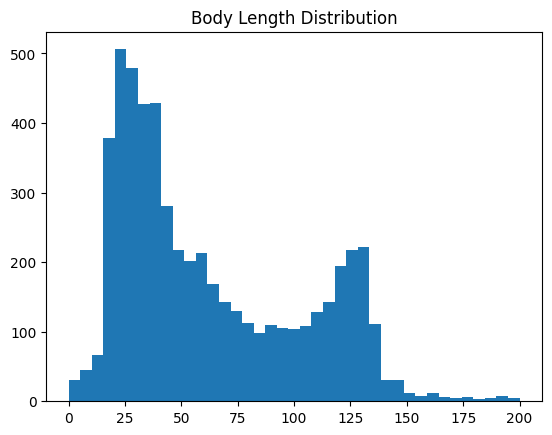

In [84]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.linspace(0,200,40)

plt.hist(dataset['body_len'],bins)
plt.title("Body Length Distribution")
plt.show()

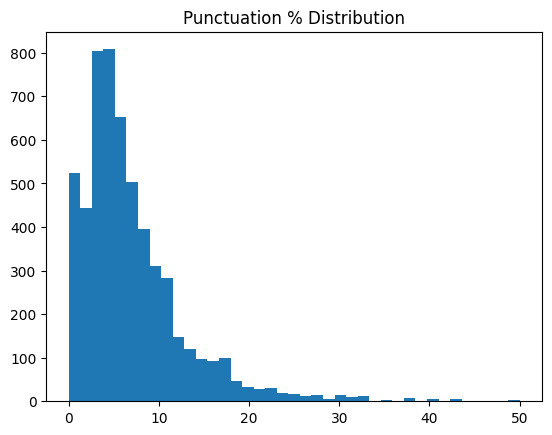

In [86]:
bins=np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title("Punctuation % Distribution")
plt.show()


# **Building Machine Learning Classifiers using Random Forest Model**

In [88]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [89]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [94]:
def count_punct(text):
  count=sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")),3)*100

dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))
dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [95]:
def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W',text)
  text=[ps.stem(word) for word in tokens if word not in stopwords]
  return text
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

In [96]:
x_features=pd.concat([dataset['body_len'],dataset['punct%'],pd.DataFrame(x_tfidf.toarray())],axis=1)
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model using K-Fold cross Validation

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)
x_features.columns = x_features.columns.astype(str)

cross_val_score(rf,x_features,dataset['label'],cv=k_fold,scoring='accuracy',n_jobs=1)


array([0.97576302, 0.97755835, 0.97576302, 0.96585804, 0.97304582])

# Model using Train Test Split

In [99]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_features,dataset['label'],test_size=0.3,random_state=0)

In [101]:
rf=RandomForestClassifier(n_estimators=500,max_depth=20,n_jobs=1)
rf_model=rf.fit(x_train,y_train)

In [104]:
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.04879398138609627, 'body_len'),
 (0.03638983276845279, '1804'),
 (0.03137362169215414, '7353'),
 (0.027446905231129845, '4799'),
 (0.02536990313035999, '3135'),
 (0.022451638184227445, '2032'),
 (0.01830319081921555, '6749'),
 (0.017457917908855855, '5727'),
 (0.015956377165945543, '6288'),
 (0.015034943764765753, '0')]

In [105]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')

In [106]:
print('Precision {} / Recall {} / Accuracy {}'.format(round(precision,3),
                                                      round(recall,3),
                                                      round((y_pred==y_test).sum()/len(y_pred),3)))

Precision 1.0 / Recall 0.556 / Accuracy 0.935
